<a href="https://colab.research.google.com/github/nargeszaeri/Occupancy-Analysis/blob/master/Q3_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Occupancy Analysis with Python
Module import

Pandas prides on handeling time series data and it has its own data type for timestamps. The datatime module provides classes for manipulating date and time in simple and complex format.

In [0]:
import io
import time
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from datetime import datetime
from google.colab import files
from datetime import timedelta
import matplotlib.pyplot as plt
from dateutil.parser import parse
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from pandas.api.types import CategoricalDtype
%matplotlib inline

Upload the .csv file :

In [0]:
uploaded = files.upload()

Saving MD_RM5206_TL.csv to MD_RM5206_TL.csv


Read sample data set from the occupancy sensor in the office



In [0]:
df = pd.read_csv(io.BytesIO(uploaded['MD_RM5206_TL.csv']), index_col=0, parse_dates=True)

Read lines from the top of a file

In [0]:
df.head()

,CS_LIGHT_MD_RM5206_TL
Timestamp,
2018-01-02 08:20:57,1.0
2018-01-02 08:21:12,0.0
2018-01-02 08:21:29,1.0
2018-01-02 08:21:44,0.0
2018-01-02 08:21:46,1.0


Read lines from the end file 

In [0]:
df.tail()

,CS_LIGHT_MD_RM5206_TL
Timestamp,
2018-12-21 13:10:49,0.0
2018-12-24 09:58:34,1.0
2018-12-24 09:58:49,0.0
2018-12-24 09:58:53,1.0
2018-12-24 09:59:08,0.0


In this work, each day was divided into 48 half- hour bins 

Resampling data to 30 minutes to count the number of arrivals in each 30 minute

Assupmtion I: The value 1 represents the time of arrivals

In [0]:
df_30_min = df.resample('30T').sum()
df_30_min

,CS_LIGHT_MD_RM5206_TL
Timestamp,
2018-01-02 08:00:00,12.0
2018-01-02 08:30:00,16.0
2018-01-02 09:00:00,1.0
2018-01-02 09:30:00,0.0
2018-01-02 10:00:00,0.0
...,...
2018-12-24 07:30:00,0.0
2018-12-24 08:00:00,0.0
2018-12-24 08:30:00,0.0


the number of arrival (1) for each half-hour counted and added up in each bin and the column has been renamed as number_arrivals

In [0]:
df_30_min.rename(columns={'CS_LIGHT_MD_RM5206_TL':'number_arrivals'}, inplace=True)
df_30_min

,number_arrivals
Timestamp,
2018-01-02 08:00:00,12.0
2018-01-02 08:30:00,16.0
2018-01-02 09:00:00,1.0
2018-01-02 09:30:00,0.0
2018-01-02 10:00:00,0.0
...,...
2018-12-24 07:30:00,0.0
2018-12-24 08:00:00,0.0
2018-12-24 08:30:00,0.0


Extract the year, month, weekday name, week, and hour data and add the column for each time step


In [0]:
df_30_min['Year'] = df_30_min.index.year
df_30_min['Month'] = df_30_min.index.month
df_30_min['Week'] = df_30_min.index.week
df_30_min['WeekDay'] = df_30_min.index.weekday_name
df_30_min['Day'] = df_30_min.index.dayofweek
df_30_min['Hour'] = df_30_min.index.hour
df_30_min

,number_arrivals,Year,Month,Week,WeekDay,Day,Hour
Timestamp,,,,,,,
2018-01-02 08:00:00,12.0,2018,1,1,Tuesday,1,8
2018-01-02 08:30:00,16.0,2018,1,1,Tuesday,1,8
2018-01-02 09:00:00,1.0,2018,1,1,Tuesday,1,9
2018-01-02 09:30:00,0.0,2018,1,1,Tuesday,1,9
2018-01-02 10:00:00,0.0,2018,1,1,Tuesday,1,10
...,...,...,...,...,...,...,...
2018-12-24 07:30:00,0.0,2018,12,52,Monday,0,7
2018-12-24 08:00:00,0.0,2018,12,52,Monday,0,8
2018-12-24 08:30:00,0.0,2018,12,52,Monday,0,8


Assupmtion II: The room is occupied if the number of arrivals is more than 2.

In [0]:
df_30_min['occupancy'] = np.where(df_30_min['number_arrivals'] > 2 , 1, 0)
df_30_min

,number_arrivals,Year,Month,Week,WeekDay,Day,Hour,occupancy
Timestamp,,,,,,,,
2018-01-02 08:00:00,12.0,2018,1,1,Tuesday,1,8,1
2018-01-02 08:30:00,16.0,2018,1,1,Tuesday,1,8,1
2018-01-02 09:00:00,1.0,2018,1,1,Tuesday,1,9,0
2018-01-02 09:30:00,0.0,2018,1,1,Tuesday,1,9,0
2018-01-02 10:00:00,0.0,2018,1,1,Tuesday,1,10,0
...,...,...,...,...,...,...,...,...
2018-12-24 07:30:00,0.0,2018,12,52,Monday,0,7,0
2018-12-24 08:00:00,0.0,2018,12,52,Monday,0,8,0
2018-12-24 08:30:00,0.0,2018,12,52,Monday,0,8,0


##**Plotting Mean Occupancy for diffrent Time Bin**

The mean number of occupancy for each hour of the day has been calculated and plotted in bar plot, as you can see from the plot we have the most occupancy betwwen 8:00 to 17:00 in 24 hours for the whole dataset

Text(0, 0.5, 'Mean Occupancy')

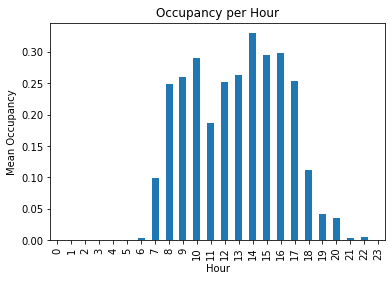

In [0]:
df_occ_hour_of_day = df_30_min.groupby(['Hour'])['occupancy'].mean()
Ax1=df_occ_hour_of_day.plot.bar(title='Occupancy per Hour')
Ax1.set_ylabel("Mean Occupancy")

In the plot below, day of the week has been sorted in order and the occupancy for each day has been shown, we have the most occupancy on Wednesdays and least occupany on Saturdays and Sundays.

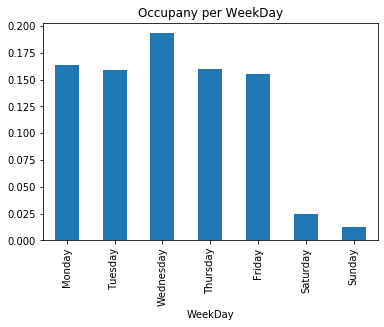

In [0]:
week_day_cat = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_day_cat_type = CategoricalDtype(categories=week_day_cat, ordered=True)
df_30_min['WeekDay'] = df_30_min['WeekDay'].astype(week_day_cat_type)
occ_weekday_name = df_30_min.groupby(['WeekDay'])['occupancy'].mean()
occ_weekday_name.plot.bar(title='Occupany per WeekDay')

As we mentioned earlier, each day was divided to 48 half-hour bin which means 336 bin per week so are index is running from 0 to 335. But we would like to modify the x_label to use more informative day of week and time of day. since we can not label every half-hour with datatime stamp we creat the lists of data times which is 24 hours for each weekday, so we can use that as the locations of major tick labels by using pandas functionality.

In [0]:
occ_hour_of_day_of_week = df_30_min.groupby((df_30_min.index.dayofweek) * 24 + (df_30_min.index.hour))['occupancy'].mean()

(0, 0.7)

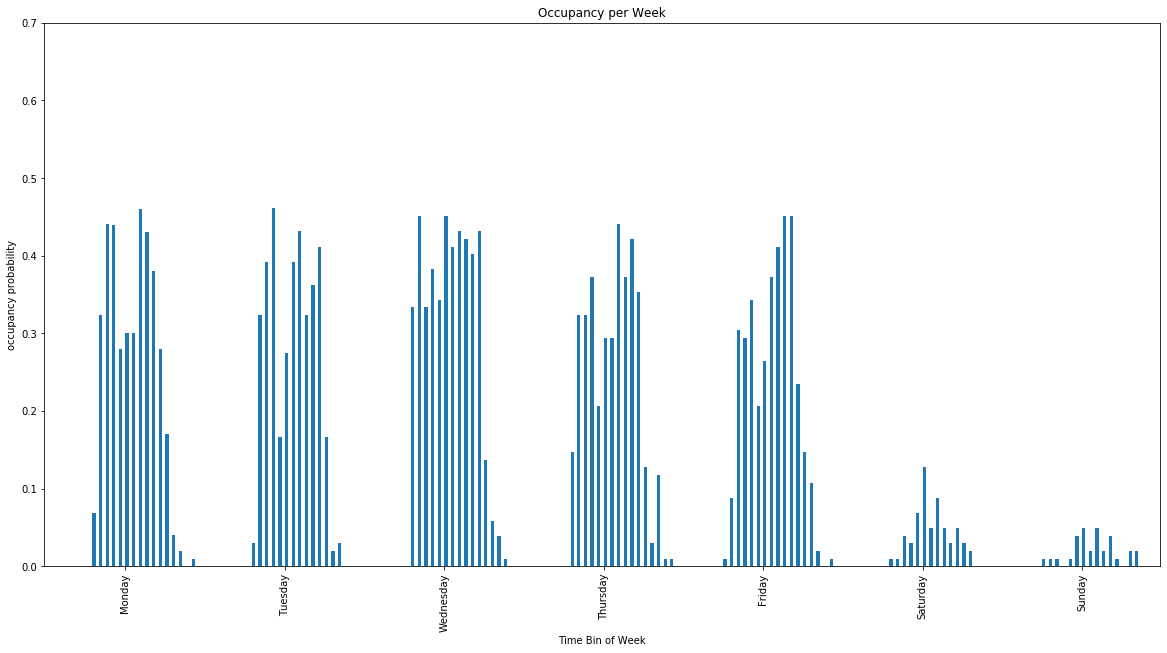

In [0]:
majors = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax = plt.subplots(figsize=(20,10))

occ_hour_of_day_of_week.plot.bar(ax=ax, title='Occupancy per Week')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=24, offset=12))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(majors))
ax.set_ylabel("occupancy probability")
ax.set_xlabel("Time Bin of Week")
plt.ylim([0, 0.7])